<a href="https://colab.research.google.com/github/steffiangel/AML/blob/main/2348510_lab5_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/program_5_dataset - program_5_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df['Sex']=le.fit_transform(df['Sex'])

In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Iterate over columns starting from the 4th column
for col in df.columns[3:]:
    # Round the values
    df[col] = df[col].round()

    # Handle non-finite values (NaN or inf)
    df[col] = df[col].fillna(df[col].mean())  # Replace NaN with 0, you can use a different value if needed
    df[col] = df[col].astype(int)


In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38,52,8,22,8,7,3,106,12,69
1,2,0,32,1,38,70,18,25,4,11,5,74,16,76
2,3,0,32,1,47,75,36,53,6,9,5,86,33,79
3,4,0,32,1,43,52,31,23,19,7,5,80,34,76
4,5,0,32,1,39,74,33,25,10,9,4,76,30,69


In [ ]:

df=df.drop(['Unnamed: 0'], axis= 1)

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38,52,8,22,8,7,3,106,12,69
1,0,32,1,38,70,18,25,4,11,5,74,16,76
2,0,32,1,47,75,36,53,6,9,5,86,33,79
3,0,32,1,43,52,31,23,19,7,5,80,34,76
4,0,32,1,39,74,33,25,10,9,4,76,30,69


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         613 non-null    float64
 5   ALP         595 non-null    float64
 6   ALT         612 non-null    float64
 7   AST         613 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        604 non-null    float64
 11  CREA        614 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,613.000000,595.000000,612.000000,613.000000,615.000000,615.000000,604.000000,614.000000,615.000000,614.000000
mean,308.000000,47.408130,41.622838,68.263529,28.493627,34.731648,11.396748,8.196634,5.368013,81.271987,39.533171,72.044137
std,177.679487,10.055105,5.784979,26.049129,25.498962,33.090023,19.673150,2.205657,1.133665,49.795186,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.607500,67.000000,15.700000,69.300000
50%,308.000000,47.000000,42.000000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,76.850000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.100000,32.900000,11.200000,9.590000,6.065000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


<Axes: >

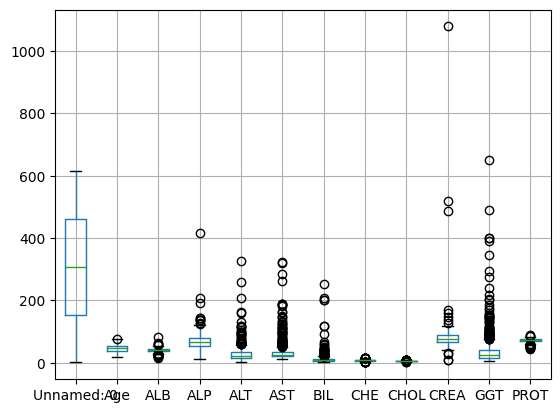

In [ ]:
df.boxplot()

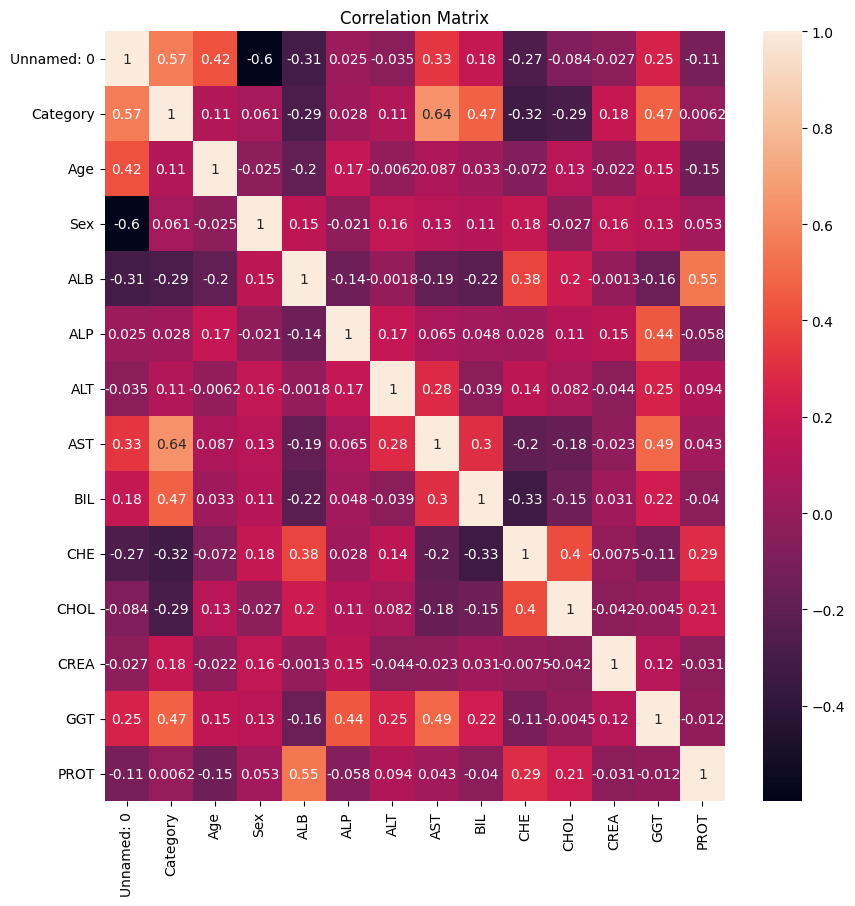

In [ ]:

plt.figure(figsize=(10,10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Category  615 non-null    int64
 1   Age       615 non-null    int64
 2   Sex       615 non-null    int64
 3   ALB       615 non-null    int64
 4   ALP       615 non-null    int64
 5   ALT       615 non-null    int64
 6   AST       615 non-null    int64
 7   BIL       615 non-null    int64
 8   CHE       615 non-null    int64
 9   CHOL      615 non-null    int64
 10  CREA      615 non-null    int64
 11  GGT       615 non-null    int64
 12  PROT      615 non-null    int64
dtypes: int64(13)
memory usage: 62.6 KB


In [ ]:
d

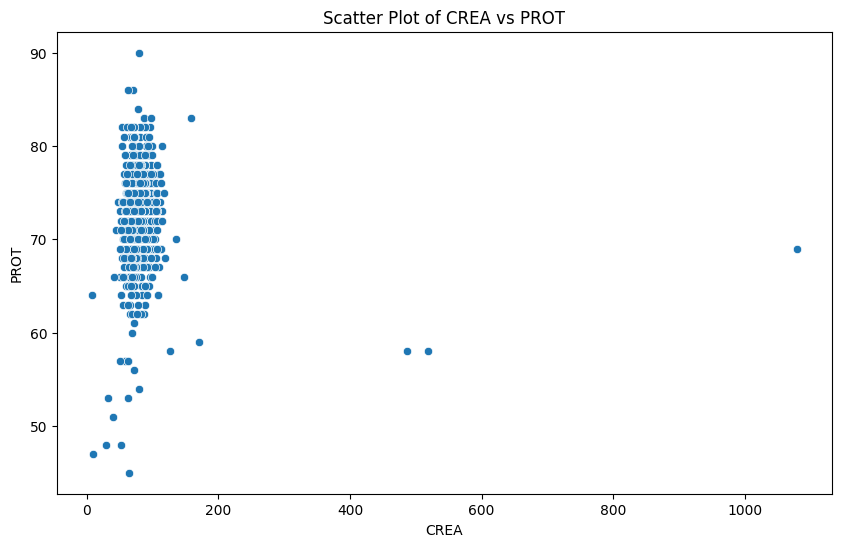

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CREA', y='PROT', data=df)
plt.title('Scatter Plot of CREA vs PROT')
plt.xlabel('CREA')
plt.ylabel('PROT')
plt.show()


In [ ]:

X = df[['CREA']]
Y = df['PROT']


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
mean=df['PROT'].mean()
mean

72.01463414634146

Text(0, 0.5, 'PROT')

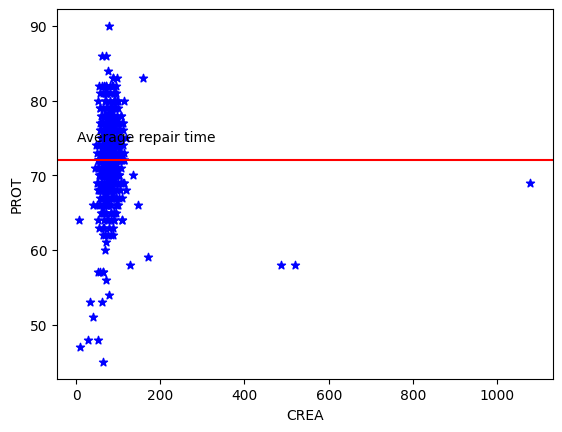

In [ ]:
plt.scatter(df['CREA'],df['PROT'],color='blue',marker='*')
plt.axhline(y=mean,color='red')
plt.annotate('Average repair time',xy=(1,mean+2.5))
plt.xlabel('CREA')
plt.ylabel('PROT')

In [ ]:
x=df.CREA
y=df.PROT
xy=x*y
n=len(df)
xmean=df.CREA.mean()
ymean=df.PROT.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean-(m*xmean)
print('intercept -c: ',c," ", 'coefficient -m: ',m)

intercept -c:  72.29287922580306   coefficient -m:  -0.003423783990974022


In [ ]:
min_best_fit_model=c+m*df.CREA
df['min_best_fit_model']=min_best_fit_model
df[['CREA','PROT','min_best_fit_model']]

,CREA,PROT,min_best_fit_model
0,106,69,71.929958
1,74,76,72.039519
2,86,79,71.998434
3,80,76,72.018977
4,76,69,72.032672
...,...,...,...
610,56,68,72.101147
611,63,71,72.077181
612,67,82,72.063486
613,52,71,72.114842


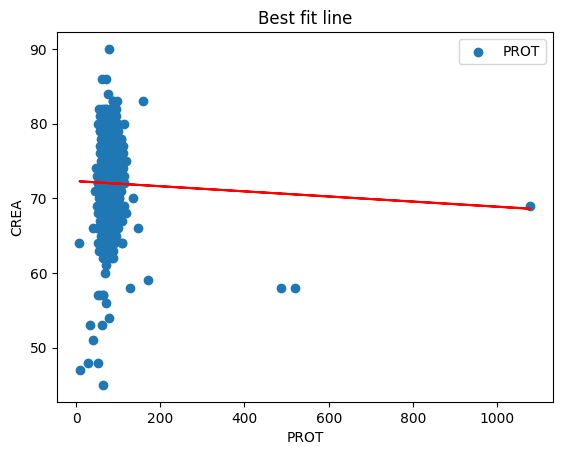

In [ ]:
fig, ax=plt.subplots()
ax.scatter(x='CREA',y='PROT',data=df)
ax.plot(df.CREA,df.min_best_fit_model,color='red')
ax.set_ylabel('CREA')
ax.set_xlabel("PROT")
ax.set_title('Best fit line')
ax.legend()


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

coef = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient: {coef:.2f}')
print(f'Intercept: {intercept:.2f}')

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



Coefficient: -0.00
Intercept: 72.23


In [ ]:

n = len(y_test)

mse = sum((y_test - y_test_pred) ** 2) / n
print(f"Mean Squared Error (MSE): {mse}")


mae = sum(abs(y_test -y_test_pred)) / n
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 29.32828567144528
Mean Absolute Error (MAE): 3.877136072281053


In [ ]:

n = len(y_train)

mse = sum((y_train - y_train_pred) ** 2) / n
print(f"Mean Squared Error (MSE): {mse}")


mae = sum(abs(y_train -y_train_pred)) / n
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 29.219203343153794
Mean Absolute Error (MAE): 3.901710059939576


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            615 non-null    int64  
 1   Age                 615 non-null    int64  
 2   Sex                 615 non-null    int64  
 3   ALB                 615 non-null    int64  
 4   ALP                 615 non-null    int64  
 5   ALT                 615 non-null    int64  
 6   AST                 615 non-null    int64  
 7   BIL                 615 non-null    int64  
 8   CHE                 615 non-null    int64  
 9   CHOL                615 non-null    int64  
 10  CREA                615 non-null    int64  
 11  GGT                 615 non-null    int64  
 12  PROT                615 non-null    int64  
 13  min_best_fit_model  615 non-null    float64
dtypes: float64(1), int64(13)
memory usage: 67.4 KB


In [ ]:

X = df[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT']]
Y = df['PROT']

In [ ]:

X = df[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns

for i in range(len(X.columns)):

    x_i = X[X.columns.difference([X.columns[i]])]
    y = X[X.columns[i]]

    X_i_with_constant = np.column_stack((np.ones(len(x_i)), x_i))

    beta = np.linalg.inv(X_i_with_constant.T @ X_i_with_constant) @ X_i_with_constant.T @ y

    # Calculate predicted values
    y_hat = X_i_with_constant @ beta

    # Calculate residuals
    residuals = y - y_hat

    # Calculate R-squared
    r_squared = 1 - (np.var(residuals) / np.var(y))

    # Calculate VIF
    vif = 1 / (1 - r_squared)

    # Update VIF values in vif_data DataFrame
    vif_data.at[i, "VIF"] = vif

print(vif_data)



  Variable       VIF
0      ALB  1.228776
1      ALP  1.360691
2      ALT  1.184774
3      AST  1.597742
4      BIL  1.226784
5      CHE  1.473539
6     CHOL  1.246807
7     CREA  1.044577
8      GGT  1.746321


In [ ]:
vif.max()

1.7463208883700796

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

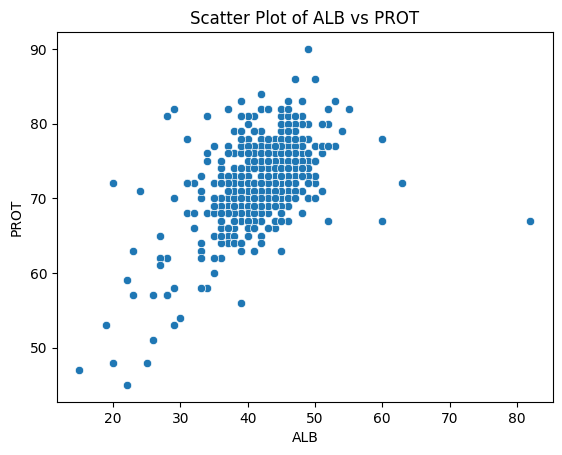

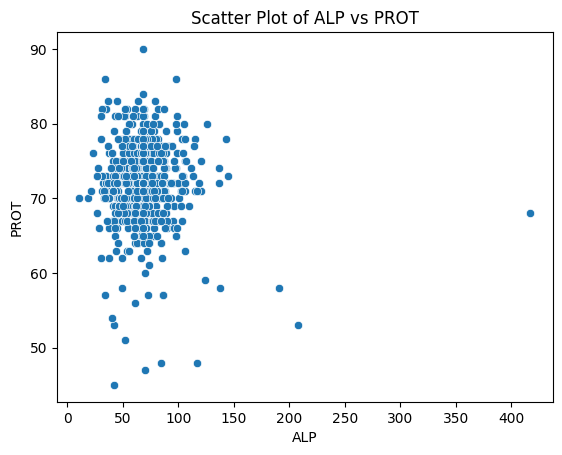

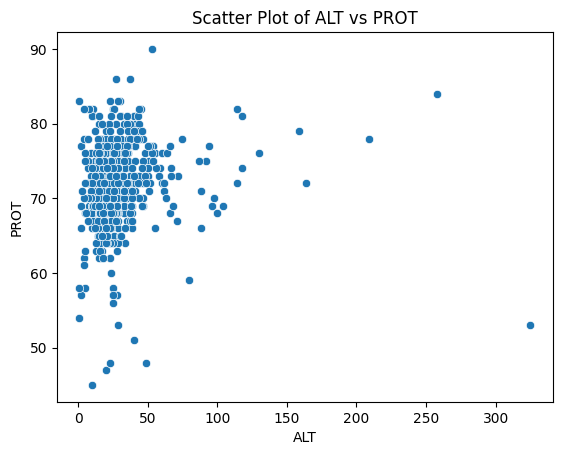

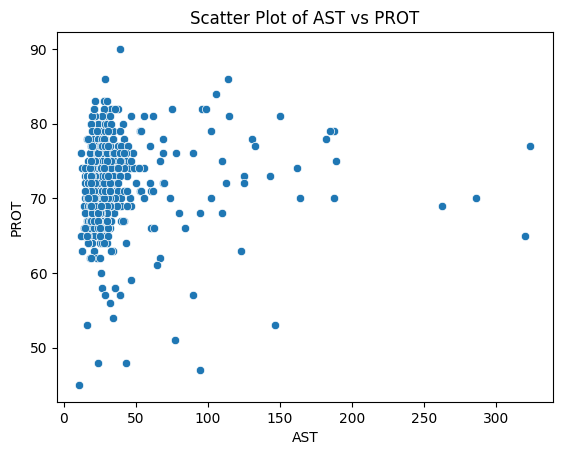

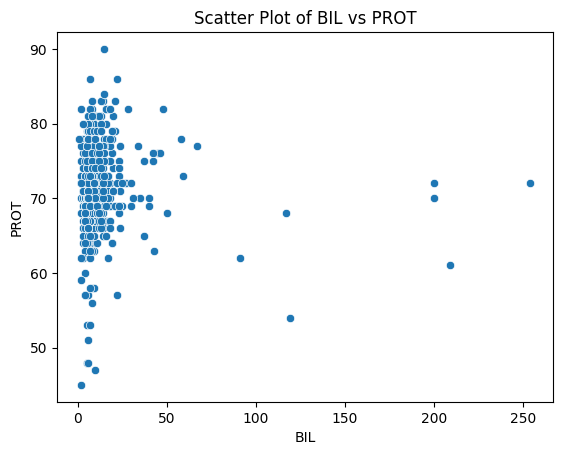

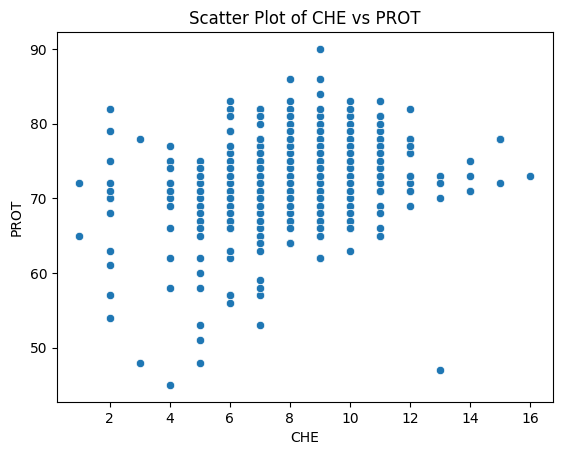

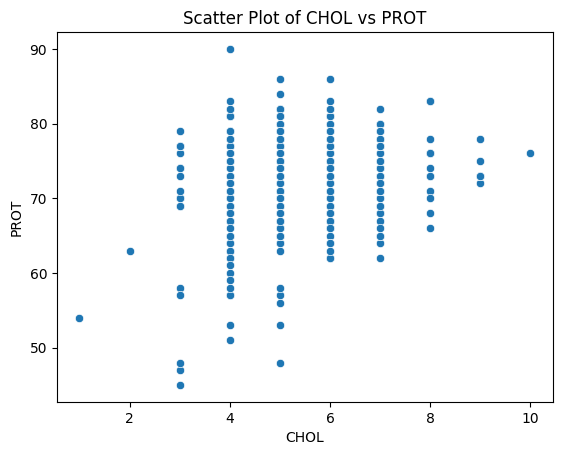

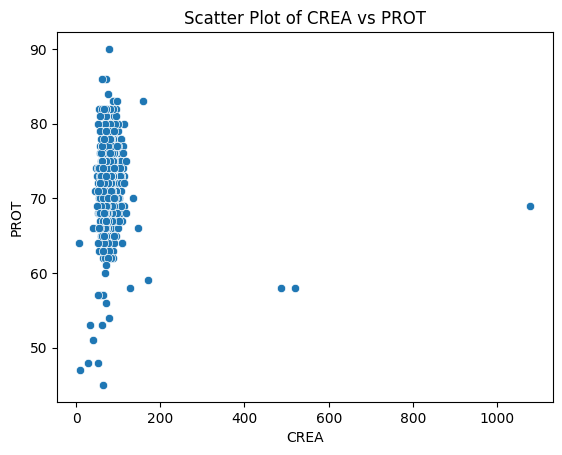

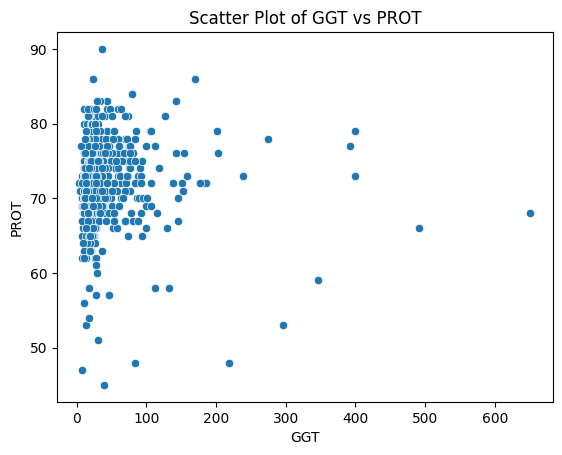

In [ ]:
selected_predictors = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT']
target_variable = 'PROT'

for predictor in selected_predictors:
    sns.scatterplot(x=df[predictor], y=df[target_variable])
    plt.title(f'Scatter Plot of {predictor} vs {target_variable}')
    plt.xlabel(predictor)
    plt.ylabel(target_variable)
    plt.show()


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

coef = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient: {coef:.2f}')
print(f'Intercept: {intercept:.2f}')

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Coefficient: -0.00
Intercept: 0.00


In [ ]:

n = len(y_test)

mse = sum((y_test - y_test_pred) ** 2) / n
print(f"Mean Squared Error (MSE): {mse}")


mae = sum(abs(y_test -y_test_pred)) / n
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 1.303352139504179e-26
Mean Absolute Error (MAE): 5.0460087779385976e-14


In [ ]:

n = len(y_train)

mse = sum((y_train - y_train_pred) ** 2) / n
print(f"Mean Squared Error (MSE): {mse}")


mae = sum(abs(y_train -y_train_pred)) / n
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 2.870305677914771e-27
Mean Absolute Error (MAE): 3.0902110139078744e-14


In [ ]:
x=df['GGT']
y=df['PROT']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_array = x_train.values

x_train = x_train_array.reshape(-1, 1)
x_test_array = x_test.values

x_test = x_test_array.reshape(-1, 1)


In [ ]:
regmodel = LinearRegression()

In [ ]:
regmodel.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,regmodel.predict(x_test))
print(score1)

-0.03132842742886077


Text(0, 0.5, 'y valuess')

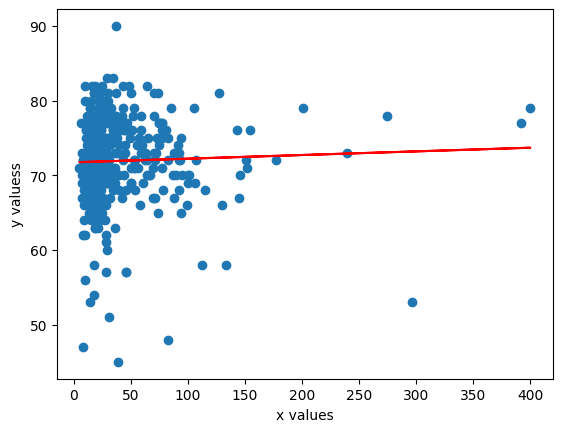

In [ ]:
plt.plot(x_train,regmodel.predict(x_train),color='r')
plt.scatter(x_train,y_train)
plt.xlabel('x values')
plt.ylabel('y valuess')

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=2,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [ ]:

remodel2=LinearRegression()

In [ ]:
remodel2.fit(x_train_p,y_train)
y_predict2=remodel2.predict(x_test_p)
score2=r2_score(y_test,y_predict2)
print(score2)

-0.010027475094755545


In [ ]:
print(remodel2.coef_)

[ 0.00000000e+00  7.90685942e-03 -1.15492726e-05]


Text(0, 0.5, 'y valuess')

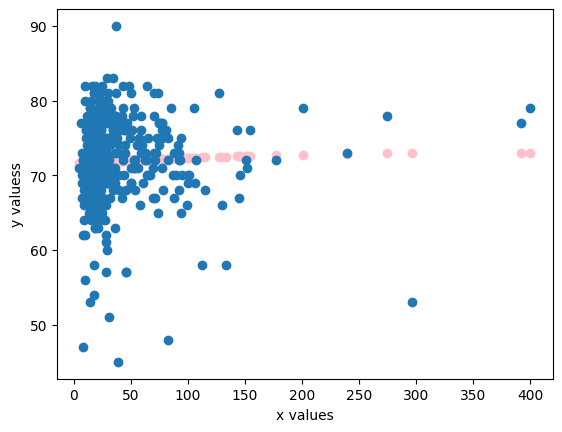

In [ ]:

plt.scatter(x_train,remodel2.predict(x_train_p),color='pink')
plt.scatter(x_train,y_train)
plt.xlabel('x values')
plt.ylabel('y valuess')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=3,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [ ]:
remodel2=LinearRegression()

In [ ]:
remodel2.fit(x_train_p,y_train)
y_predict2=remodel2.predict(x_test_p)
score2=r2_score(y_test,y_predict2)
print(score2)

-6.2301548986086255


In [ ]:
print(remodel2.coef_)

[ 0.00000000e+00  8.07448091e-02 -7.49107808e-04  1.49552973e-06]


Text(0, 0.5, 'y valuess')

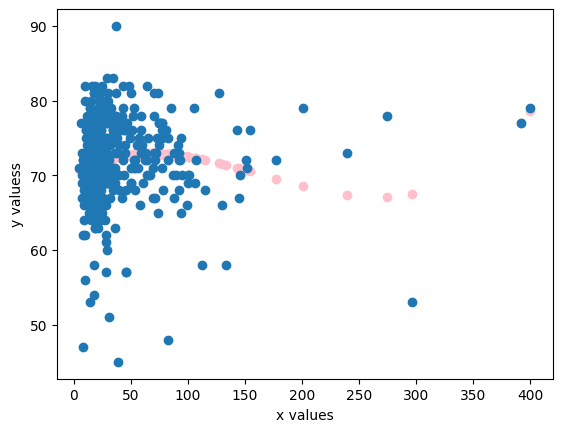

In [ ]:

plt.scatter(x_train,remodel2.predict(x_train_p),color='pink')
plt.scatter(x_train,y_train)
plt.xlabel('x values')
plt.ylabel('y valuess')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=4,include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [ ]:
remodel2=LinearRegression()

In [ ]:
remodel2.fit(x_train_p,y_train)
y_predict2=remodel2.predict(x_test_p)
score2=r2_score(y_test,y_predict2)
print(score2)

-3.1243434084462756


In [ ]:
print(remodel2.coef_)

[ 0.00000000e+00  1.33759409e-01 -1.62215608e-03  5.82846863e-06
 -6.23061255e-09]


Text(0, 0.5, 'y valuess')

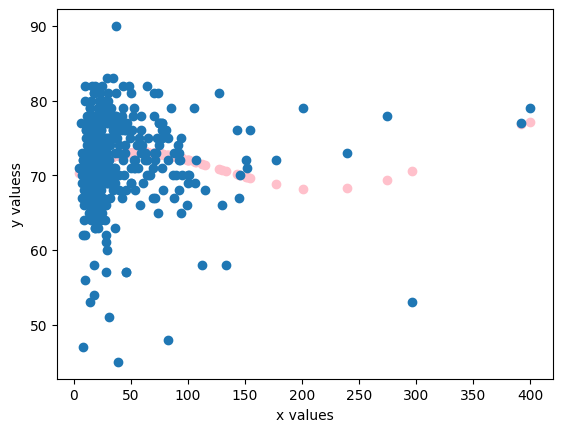

In [ ]:

plt.scatter(x_train,remodel2.predict(x_train_p),color='pink')
plt.scatter(x_train,y_train)
plt.xlabel('x values')
plt.ylabel('y valuess')

In [ ]:
x=df['GGT']
y=df['PROT']

In [ ]:
from sklearn.model_selection import cross_val_score
model1=LinearRegression()
x_train_array = x.values

x = x_train_array.reshape(-1, 1)

mse=cross_val_score(model1,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-30.534340665102498


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge()

In [ ]:
parameters={'alpha':[0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 150}
-30.53359623467393


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[0.01,1,5,10,20,30,35,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
prediction_ridge = ridge_regressor.predict(x_test)
prediction_lasso = lasso_regressor.predict(x_test)


mse_ridge = mean_squared_error(y_test, prediction_ridge)
mse_lasso = mean_squared_error(y_test, prediction_lasso)

print(f"Optimal Ridge Alpha: {prediction_ridge}")
print(f"Mean Squared Error (Ridge): {mse_ridge}")

print(f"\nOptimal Lasso Alpha: {prediction_lasso}")
print(f"Mean Squared Error (Lasso): {mse_lasso}")

Optimal Ridge Alpha: [72.04287054 71.82065324 72.04887641 71.94317305 72.03806584 72.04647406
 72.04046819 72.0020306  72.03566349 72.04767524 72.04767524 72.03806584
 71.98161063 72.04287054 72.01164    72.04407171 72.03326114 72.01524352
 72.01284117 72.02725527 72.05007759 71.98521416 71.95998949 72.02245057
 72.02845644 72.0164447  72.05608346 72.03326114 72.04407171 72.00323178
 72.04407171 72.03446232 72.05127876 72.04166936 72.05007759 72.05007759
 72.03926701 72.05007759 71.88671784 72.02245057 72.04287054 71.93356365
 72.05007759 72.04287054 71.96959889 72.04046819 72.02845644 71.94917892
 72.02845644 71.97800711 72.02725527 72.04647406 71.95158127 72.03205997
 72.04407171 72.04287054 72.04527289 72.02965762 72.04166936 72.00443295
 72.03326114 71.98761651 72.01043882 71.98521416 72.05368111 72.04287054
 72.02365174 72.01043882 72.02845644 72.03926701 72.02365174 72.04407171
 72.04527289 72.02485292 72.03326114 71.28012467 72.04046819 72.01043882
 72.04527289 72.04166936 71.58

In [ ]:
ridge_intercept = ridge_regressor.best_estimator_.intercept_
ridge_coefficients = ridge_regressor.best_estimator_.coef_

#print(f"Optimal Ridge Alpha: {ridge_optimal_alpha}")
print(f"Intercept (Ridge): {ridge_intercept}")
print(f"Coefficients (Ridge): {ridge_coefficients}")

Intercept (Ridge): 72.0620893321409
Coefficients (Ridge): [-0.00120117]


In [ ]:
lasso_intercept = lasso_regressor.best_estimator_.intercept_
lasso_coefficients = lasso_regressor.best_estimator_.coef_

#print(f"Optimal Lasso Alpha: {lasso_optimal_alpha}")
print(f"Intercept (Lasso): {lasso_intercept}")
print(f"Coefficients (Lasso): {lasso_coefficients}")

Intercept (Lasso): 72.01463414634146
Coefficients (Lasso): [-0.]
